In [4]:
from numpy import log2, sqrt, log
from AllFunctions import *
import matplotlib.pyplot as plt

In [5]:
train, train_labels, test, test_labels = load_bank()

for i in range(len(train_labels)):
    if train_labels[i] =='no':
        train_labels[i] = -1
    elif train_labels[i] =='yes':
        train_labels[i] = 1
        
    
    if test_labels[i] =='no':
        test_labels[i] = -1
    elif test_labels[i] =='yes':
        test_labels[i] = 1

In [6]:
def Weighted_Error(x, y, W, DT):
    
    phi = [True]* len(x)
    weight = 0
    for i in range(len(x)):
        xi = x[i]
        yi = DT.predict(xi)
        
        if yi != y[i]:
            weight += W[i]
            phi[i] = False

    return (weight / sum(W), phi) 

In [7]:
class Adaboost:
    
    def __init__(self, train, train_labels, n_iteration):
        
        self.n_iteration = n_iteration
        self.Trees = []
        self.Coefficients = []  #inside update_weights will be updated 
        self.Wts = [] #inside update_weights will be updated
        self.Epsilons = []
        DT = None
        
        
        for x in range(n_iteration):
        
            self.update_weights(train, train_labels, DT)
            
            DT = DecisionTree(train, train_labels, [i for i in range(len(train[0]))], depth = 3, weights = self.Wts)
            self.Trees.append(DT)
     
    
    
    def update_weights(self, train, train_labels, DT):
    
        n = len(train_labels)
    
        if DT == None:
            self.Wts = [1/n]*n
            self.Coefficients.append(1)
            return
    
        Epsilon, phi = Weighted_Error(train, train_labels, self.Wts, DT)
        
        self.Epsilons.append(Epsilon)

        
        alpha = (1/2) * log((1-Epsilon)/Epsilon)
        #print('alpha', alpha)
        
        self.Coefficients.append(alpha)
    
        for i in range(n):
            if phi[i] == False:
                self.Wts[i] = self.Wts[i] * (sqrt((1-Epsilon)/Epsilon))
            elif phi[i] == True:
                self.Wts[i] = self.Wts[i] * (sqrt(Epsilon/(1-Epsilon)))
    
        Sum = sum(self.Wts)
        for i in range(n): 
            self.Wts[i] = self.Wts[i]/Sum
    
     
    def adapredict(self, x, n = None):
        
        if n == None:
            n = self.n_iteration 
            
        Sum = 0
        for i in range(n):
            
            Sum += self.Coefficients[i] * self.Trees[i].predict(x) 
        
        if Sum >= 0:
            return (1)
        else:
            return (-1) 
            
            

    def Error(self, X, Y, n = None):
        
        if n == None:
            n = self.n_iteration 
            
        
        E_list = [0] * n
        
        
        for i in range(len(Y)):
            Sum = 0
            
            for j in range(n):
                Sum += self.Coefficients[j] * self.Trees[j].predict(X[i]) 
                
                if Sum >= 0 and Y[i] == -1 or Sum < 0 and Y[i] == 1:
                    E_list[j] += 1/len(Y)
                    
        return (E_list)

# Plot Error 

In [9]:
Ada = Adaboost(train, train_labels, 1000)

In [11]:
E_train = Ada.Error(train, train_labels, n = 1000)
E_test = Ada.Error(test, test_labels, n = 1000)

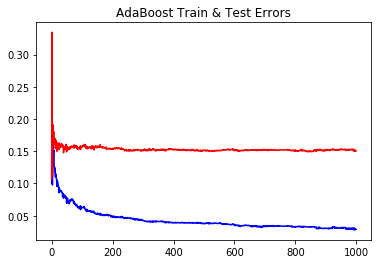

In [12]:
plt.plot(E_train, color ='blue')
plt.plot(E_test, color ='red')

plt.axis()
plt.title("AdaBoost Train & Test Errors", color='black') 
plt.show()

In [16]:
err_train = [0] * 1000
err_test = [0] * 1000

for i in range(1000): 
    err_train[i] = error(Ada.Trees[i], train, train_labels)
    err_test[i] = error(Ada.Trees[i], test, test_labels)

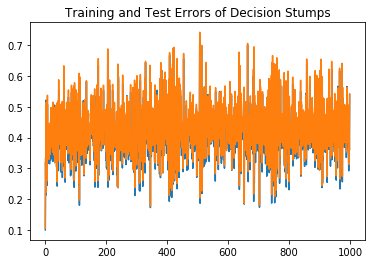

In [17]:
import matplotlib.pyplot as plt

plt.plot(err_train)
plt.plot(err_test)
plt.title("Training and Test Errors of Decision Stumps")
plt.show()